In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import random

#### Đọc dữ liệu

In [2]:
# Tạo DataFrame
df = pd.read_csv('sinh_vien_data.csv')

# Lưu dữ liệu vào file CSV
df

,Họ và tên,Điểm 1,Điểm 2,Điểm 3,Điểm thi
0,Phan Trọng Tú,9,4,9,10
1,Lê Trọng Hương,7,0,7,7
2,Phạm Quốc Nam,8,2,4,5
3,Đặng Duy Trang,2,9,5,8
4,Phan Anh Nam,0,9,1,3
...,...,...,...,...,...
1995,Bùi Hữu Hạnh,1,8,0,4
1996,Hoàng Tấn Khánh,6,5,8,8
1997,Đỗ Minh Phương,10,7,4,9
1998,Trần Anh Hạnh,10,0,9,8


#### Vẽ các biểu đồ phân phối các cột của dữ liệu

##### Cột điểm 1

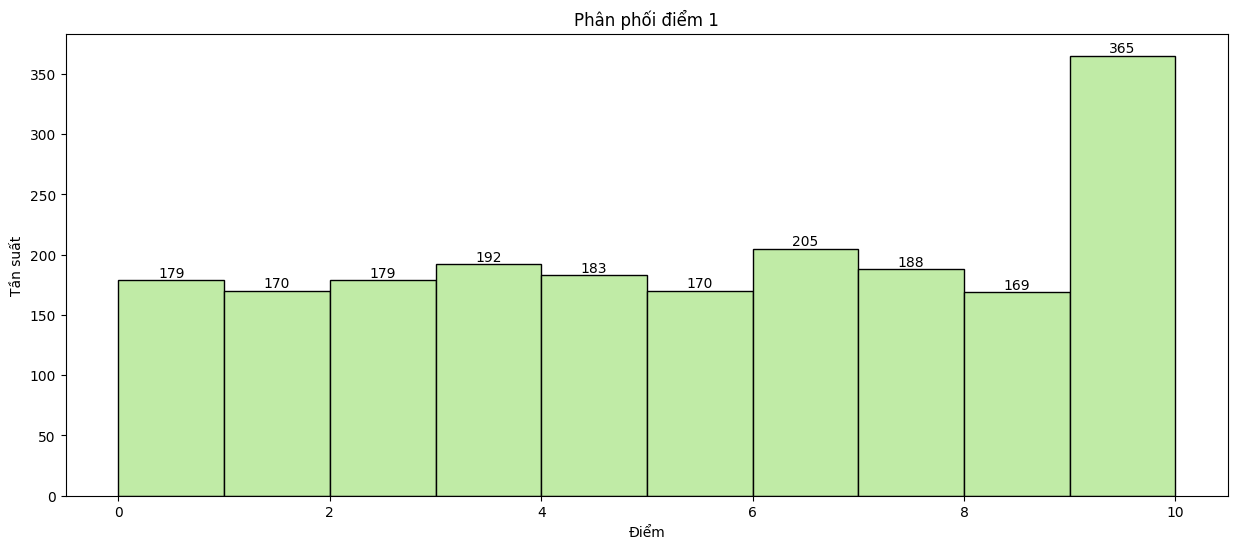

In [3]:
# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm 1"], bins=10, color='#C0EBA6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 1')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


##### Cột điểm 2

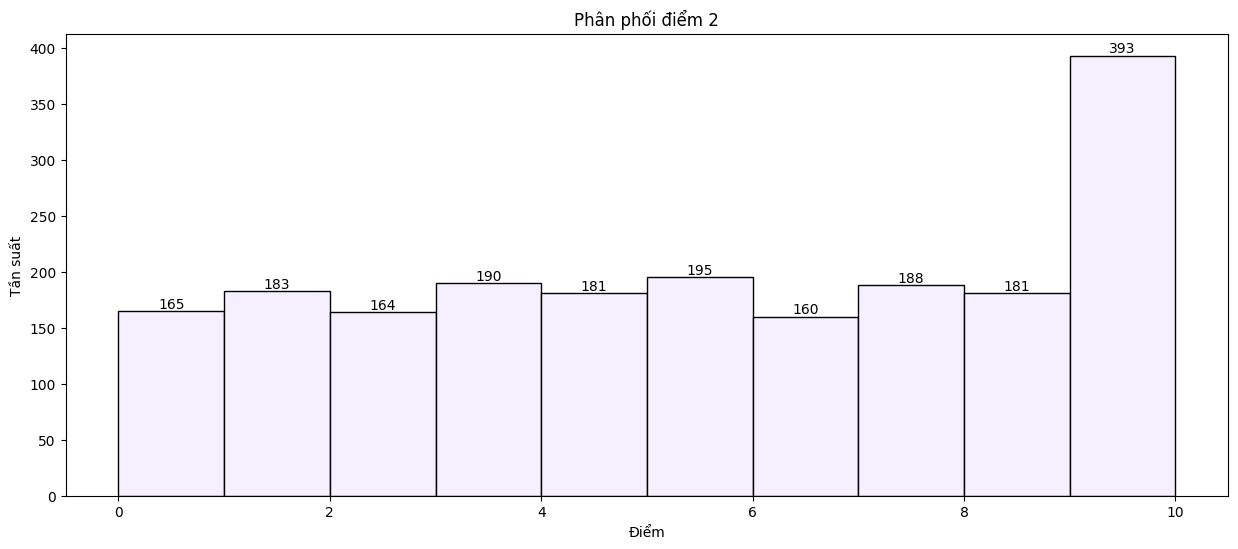

In [4]:
# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm 2"], bins=10, color='#F5EFFF', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 2')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


##### Cột điểm 3

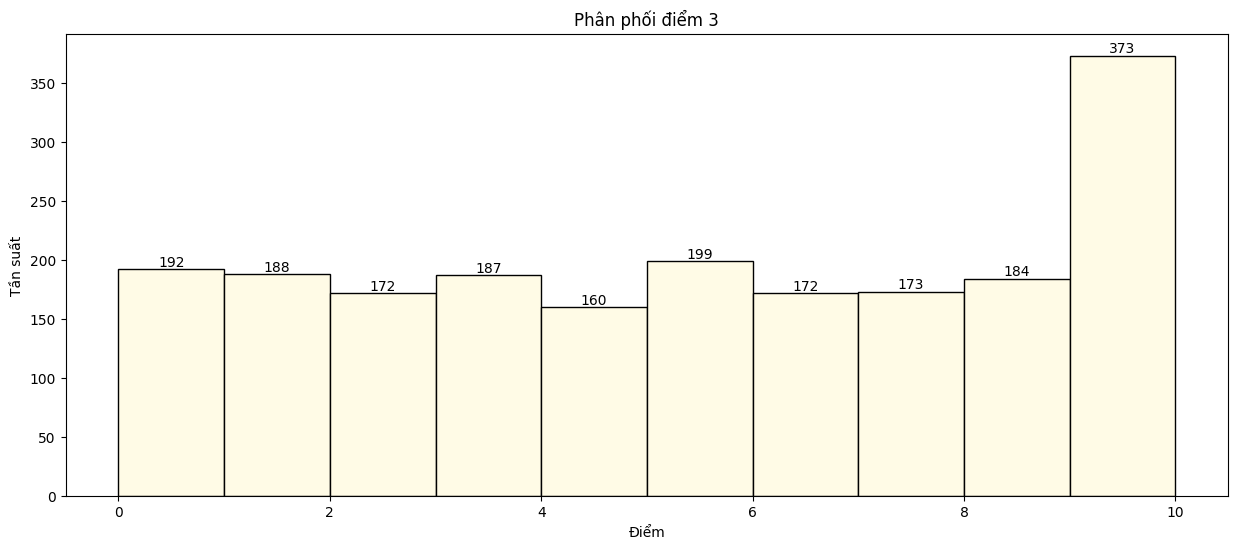

In [5]:

# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm 3"], bins=10, color='#FFFBE6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 3')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


##### Cột điểm thi

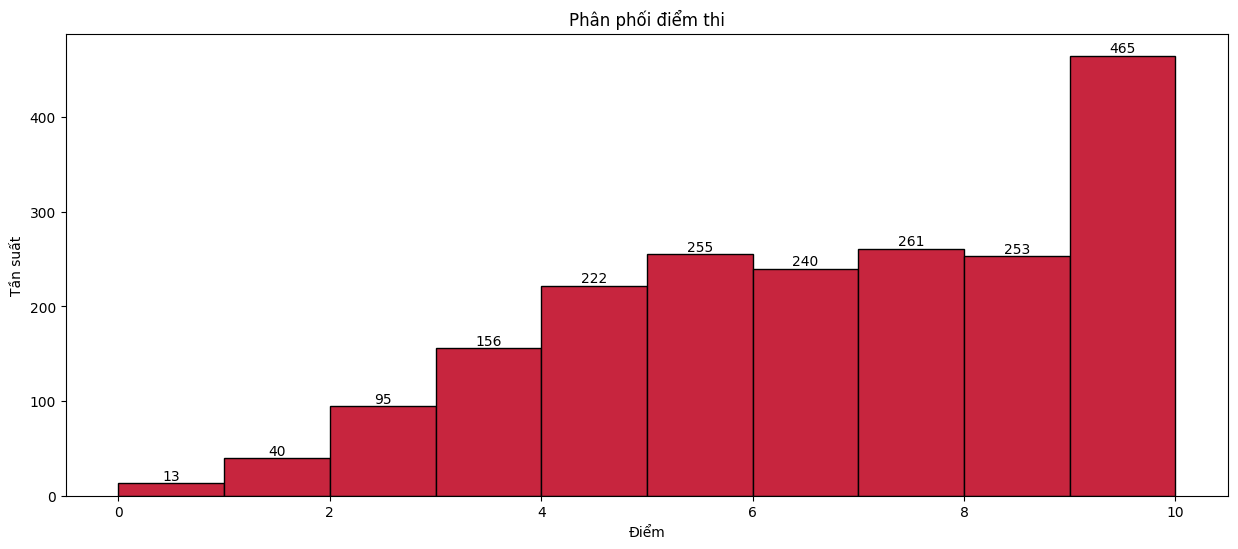

In [6]:

# Tạo figure và vẽ histogram
plt.figure(figsize=(15,6))
counts, bins, patches = plt.hist(df["Điểm thi"], bins=10, color='#C7253E', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm thi')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Thêm nhãn số liệu lên các cột của biểu đồ
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2,  # Vị trí x của nhãn (giữa cột)
             count,                                 # Vị trí y của nhãn (tần suất)
             str(int(count)),                       # Nội dung nhãn (tần suất dưới dạng số nguyên)
             ha='center',                           # Canh giữa
             va='bottom')                           # Đặt nhãn phía trên cột

# Hiển thị biểu đồ
plt.show()


#### Huấn luyện mô hình

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

##### Chọn ra các features và chia tập train-test

In [8]:
X = df.drop(columns=["Họ và tên", "Điểm thi"])
y = df["Điểm thi"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

##### Chuẩn hóa dữ liệu của các features

In [10]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Mô hình Linear Regression

In [11]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
rmse_lr = root_mean_squared_error(y_test, y_pred)

##### Mô hình CNN

Epoch 1/500, Train Loss: 474.6634, Test Loss: 60.1666
Epoch 2/500, Train Loss: 21.1240, Test Loss: 8.7468
Epoch 3/500, Train Loss: 8.1023, Test Loss: 6.5177
Epoch 4/500, Train Loss: 6.4375, Test Loss: 5.3922
Epoch 5/500, Train Loss: 5.4048, Test Loss: 4.5544
Epoch 6/500, Train Loss: 4.5280, Test Loss: 3.8093
Epoch 7/500, Train Loss: 3.4713, Test Loss: 2.7054
Epoch 8/500, Train Loss: 2.4339, Test Loss: 1.8456
Epoch 9/500, Train Loss: 1.6419, Test Loss: 1.2609
Epoch 10/500, Train Loss: 1.1994, Test Loss: 0.9755
Epoch 11/500, Train Loss: 1.0173, Test Loss: 0.8555
Epoch 12/500, Train Loss: 0.9366, Test Loss: 0.7971
Epoch 13/500, Train Loss: 0.8926, Test Loss: 0.7619
Epoch 14/500, Train Loss: 0.8618, Test Loss: 0.7345
Epoch 15/500, Train Loss: 0.8361, Test Loss: 0.7107
Epoch 16/500, Train Loss: 0.8144, Test Loss: 0.6887
Epoch 17/500, Train Loss: 0.7938, Test Loss: 0.6714
Epoch 18/500, Train Loss: 0.7758, Test Loss: 0.6573
Epoch 19/500, Train Loss: 0.7597, Test Loss: 0.6466
Epoch 20/500, Tra

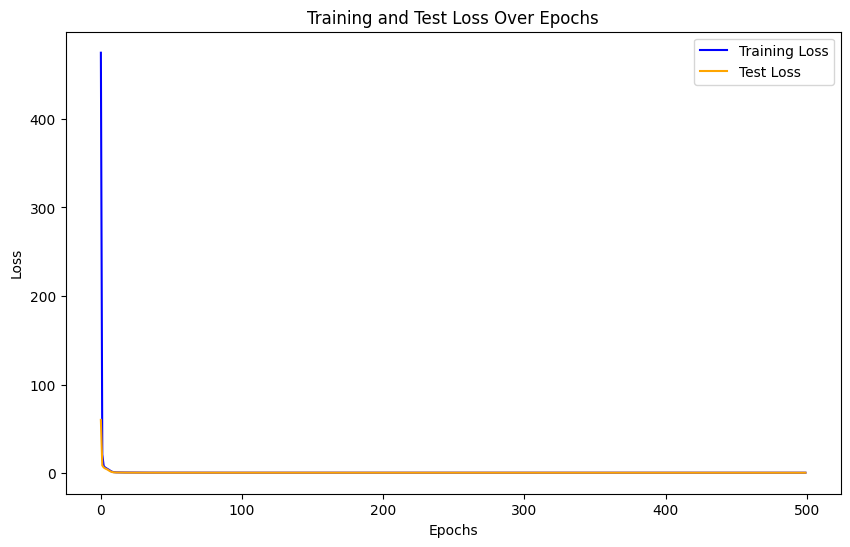

In [12]:
import tensorflow as tf

class CNNModel(tf.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1_weights = tf.Variable(tf.random.normal([3, 1, 1, 32]), name='conv1_weights', dtype=tf.float32)  # Lớp Conv2D với 32 filters
        self.dense1_weights = tf.Variable(tf.random.normal([32 * 1 * 1, 48]), name='dense1_weights', dtype=tf.float32)  # Fully connected layer 1
        self.dense2_weights = tf.Variable(tf.random.normal([48, 1]), name='dense2_weights', dtype=tf.float32)   # Fully connected layer 2

    def __call__(self, x):
        x = tf.reshape(x, [-1, 3, 1, 1])  # Reshape input thành [batch_size, height=3, width=1, channels=1]
        conv = tf.nn.conv2d(x, self.conv1_weights, strides=[1, 1, 1, 1], padding="VALID")
        conv = tf.nn.relu(conv)  # Activation ReLU
        conv_flat = tf.reshape(conv, [-1, 32 * 1 * 1])  # Flatten
        dense1_out = tf.matmul(conv_flat, self.dense1_weights)
        dense1_out = tf.nn.relu(dense1_out)  # Activation ReLU
        output = tf.matmul(dense1_out, self.dense2_weights)  # Output layer
        return output
    
# Khởi tạo mô hình
model = CNNModel()

# Hàm mất mát (loss function)
loss_fn = tf.losses.MeanSquaredError()

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Hàm huấn luyện một batch
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Giả định đã có dữ liệu X_train, y_train, X_test, y_test
X_train_dl = X_train.astype(np.float32)
y_train_dl = y_train.astype(np.float32)
X_test_dl = X_test.astype(np.float32)
y_test_dl = y_test.astype(np.float32)

# Lưu giá trị loss
train_loss_values = []
test_loss_values = []

# Huấn luyện mô hình
epochs = 500
batch_size = 32
for epoch in range(epochs):
    epoch_loss = 0
    # Huấn luyện
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i + batch_size]
        y_batch = y_train_dl[i:i + batch_size]
        loss = train_step(X_batch, y_batch)
        epoch_loss += loss.numpy()
    
    avg_train_loss = epoch_loss / (len(X_train_dl) // batch_size)
    train_loss_values.append(avg_train_loss)

    # Tính loss của tập test
    test_predictions = model(X_test_dl)
    test_loss = loss_fn(y_test_dl, test_predictions)
    avg_test_loss = test_loss.numpy()
    test_loss_values.append(avg_test_loss)

    print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Vẽ biểu đồ loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_values, label='Training Loss', color='blue')
plt.plot(test_loss_values, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()


In [13]:
# test_loss = loss_fn(y_test_dl, model(X_test_dl)).numpy()
y_pred = model(X_test_dl)

In [14]:
mse_cnn = mean_squared_error(y_test_dl, y_pred)
mae_cnn = mean_absolute_error(y_test_dl, y_pred)
mape_cnn = mean_absolute_percentage_error(y_test_dl, y_pred)
rmse_cnn = root_mean_squared_error(y_test_dl, y_pred)

##### Mô hình RNN

In [15]:
import tensorflow as tf

# Giả định đã có dữ liệu X_train, y_train, X_test, y_test
# Dưới đây là mô hình RNN được định nghĩa như trên
class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        self.hidden_size = hidden_size
        self.Wxh = tf.Variable(tf.random.normal([input_size, hidden_size]), name='Wxh')
        self.Whh = tf.Variable(tf.random.normal([hidden_size, hidden_size]), name='Whh')
        self.bh = tf.Variable(tf.zeros([hidden_size]), name='bh')
        self.Why = tf.Variable(tf.random.normal([hidden_size, 1]), name='Why')
        self.by = tf.Variable(tf.zeros([1]), name='by')

    def step(self, x, h):
        h = tf.tanh(tf.matmul(x, self.Wxh) + tf.matmul(h, self.Whh) + self.bh)
        y = tf.matmul(h, self.Why) + self.by
        return y, h

    def forward(self, x):
        h = tf.zeros([x.shape[0], self.hidden_size])  # Initialize hidden state
        for t in range(x.shape[1]):  # Loop over time steps
            y, h = self.step(x[:, t, :], h)
        return y

    @property
    def trainable_variables(self):
        return [self.Wxh, self.Whh, self.bh, self.Why, self.by]

# Tạo mô hình
model = SimpleRNN(input_size=3, hidden_size=64)

# Tạo optimizer
optimizer = tf.optimizers.Adam()

# Hàm tính loss
loss_fn = tf.losses.MeanSquaredError()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model.forward(x)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Hàm tính loss trên tập test
@tf.function
def test_loss(x, y):
    predictions = model.forward(x)
    loss = loss_fn(y, predictions)
    return loss

# Chuyển đổi dữ liệu sang định dạng phù hợp
X_train_dl = X_train.astype(np.float32).reshape(-1, 1, 3)
y_train_dl = y_train.values.astype(np.float32).reshape(-1, 1, 1)
X_test_dl = X_test.astype(np.float32).reshape(-1, 1, 3)
y_test_dl = y_test.values.astype(np.float32).reshape(-1, 1, 1)

# Định nghĩa số epoch và batch size
epochs = 500
batch_size = 32

# List lưu loss để vẽ biểu đồ
train_losses = []
test_losses = []

# Vòng lặp huấn luyện
for epoch in range(epochs):
    # Huấn luyện trên tập train
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i + batch_size]
        y_batch = y_train_dl[i:i + batch_size]
        train_loss = train_step(X_batch, y_batch)
    
    # Tính loss trên tập test sau mỗi epoch
    test_loss_value = test_loss(X_test_dl, y_test_dl)
    
    # Lưu lại loss để vẽ biểu đồ
    train_losses.append(train_loss.numpy())
    test_losses.append(test_loss_value.numpy())
    
    print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss.numpy():.4f}, Test Loss: {test_loss_value.numpy():.4f}')

Epoch 1/500, Train Loss: 42.2116, Test Loss: 29.1324
Epoch 2/500, Train Loss: 19.4133, Test Loss: 16.0667
Epoch 3/500, Train Loss: 12.1887, Test Loss: 11.5447
Epoch 4/500, Train Loss: 8.5528, Test Loss: 8.3750
Epoch 5/500, Train Loss: 6.0591, Test Loss: 5.9307
Epoch 6/500, Train Loss: 4.2458, Test Loss: 4.1207
Epoch 7/500, Train Loss: 2.9657, Test Loss: 2.8461
Epoch 8/500, Train Loss: 2.1067, Test Loss: 1.9987
Epoch 9/500, Train Loss: 1.5623, Test Loss: 1.4694
Epoch 10/500, Train Loss: 1.2360, Test Loss: 1.1584
Epoch 11/500, Train Loss: 1.0490, Test Loss: 0.9850
Epoch 12/500, Train Loss: 0.9440, Test Loss: 0.8910
Epoch 13/500, Train Loss: 0.8838, Test Loss: 0.8391
Epoch 14/500, Train Loss: 0.8464, Test Loss: 0.8081
Epoch 15/500, Train Loss: 0.8204, Test Loss: 0.7867
Epoch 16/500, Train Loss: 0.7999, Test Loss: 0.7697
Epoch 17/500, Train Loss: 0.7825, Test Loss: 0.7548
Epoch 18/500, Train Loss: 0.7667, Test Loss: 0.7409
Epoch 19/500, Train Loss: 0.7523, Test Loss: 0.7278
Epoch 20/500, T

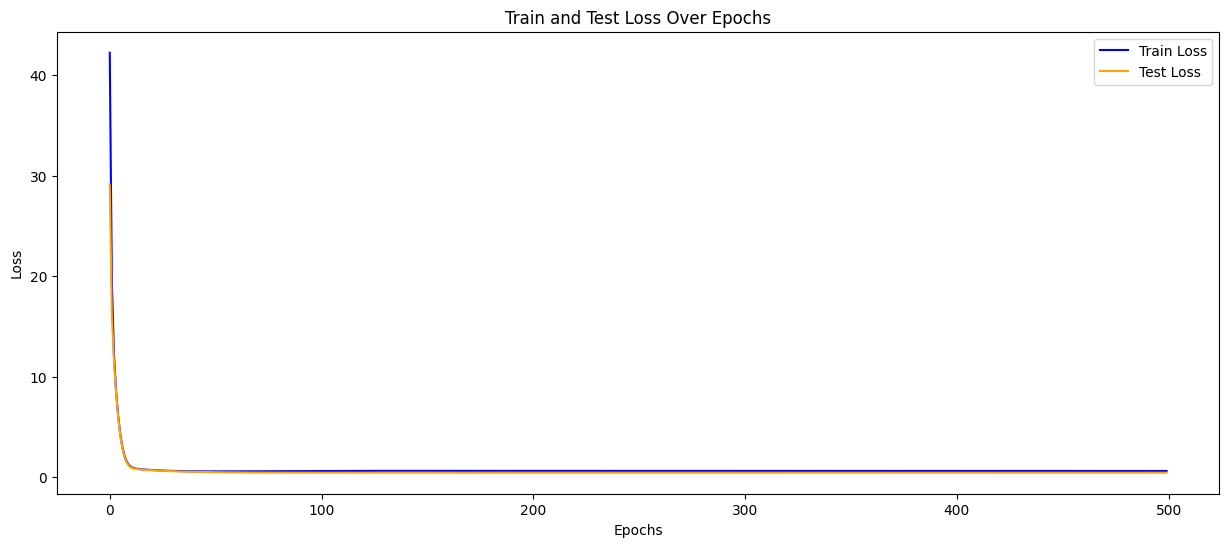

In [16]:
# Vẽ biểu đồ loss
plt.figure(figsize=(15, 6))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()
plt.show()

In [17]:
y_pred = model.forward(X_test_dl.reshape(-1, 1, 3))

In [18]:
y_test_dl = y_test_dl.reshape(-1, 1)
y_test_dl.shape

(400, 1)

In [19]:
mse_rnn = mean_squared_error(y_test, y_pred)
mae_rnn = mean_absolute_error(y_test_dl, y_pred)
mape_rnn = mean_absolute_percentage_error(y_test_dl, y_pred)
rmse_rnn = root_mean_squared_error(y_test_dl, y_pred)

#### So sánh độ mất mát của 3 mô hình Linear Regression - CNN - RNN

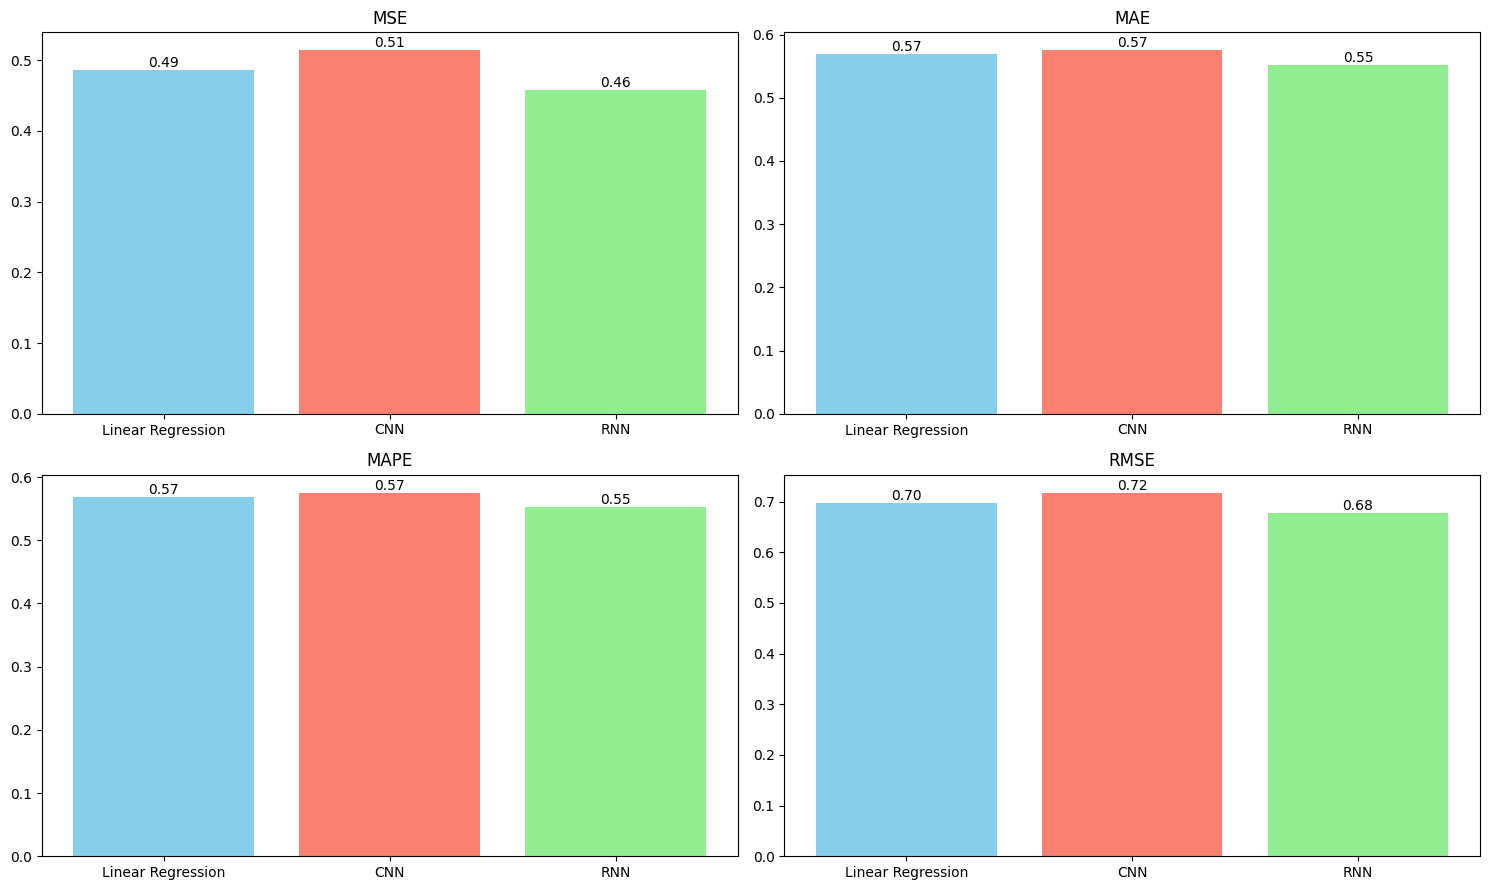

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

bar1 = ax[0][0].bar(['Linear Regression', 'CNN', 'RNN'], [mse_lr, mse_cnn, mse_rnn], color=['skyblue', 'salmon', 'lightgreen'])
ax[0][0].set_title("MSE")
for bar in bar1:
    height = bar.get_height()
    ax[0][0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar2 = ax[0][1].bar(['Linear Regression', 'CNN', 'RNN'], [mae_lr, mae_cnn, mae_rnn], color=['skyblue', 'salmon', 'lightgreen'])
ax[0][1].set_title("MAE")
for bar in bar2:
    height = bar.get_height()
    ax[0][1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar3 = ax[1][0].bar(['Linear Regression', 'CNN', 'RNN'], [mae_lr, mae_cnn, mae_rnn], color=['skyblue', 'salmon', 'lightgreen'])
ax[1][0].set_title("MAPE")
for bar in bar3:
    height = bar.get_height()
    ax[1][0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar4 = ax[1][1].bar(['Linear Regression', 'CNN', 'RNN'], [rmse_lr, rmse_cnn, rmse_rnn], color=['skyblue', 'salmon', 'lightgreen'])
ax[1][1].set_title("RMSE")
for bar in bar4:
    height = bar.get_height()
    ax[1][1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()